In [72]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load trajectories
traj_bent_protein = md.load('bent_4_microsecond_c_alpha.xtc', top='bent_4_microsecond_c_alpha_frame0.pdb')
traj_int1_protein = md.load('int1_4_microsecond_c_alpha.xtc', top='int1_4_microsecond_c_alpha_frame0.pdb')

# Crop each trajectory to the required frames
traj_bent_protein = traj_bent_protein[20000:45000]
traj_int1_protein = traj_int1_protein[20000:45000]

# Select C-alpha atoms
ca_atoms_bent = traj_bent_protein.topology.select('name CA')
ca_atoms_int1 = traj_int1_protein.topology.select('name CA')

# Extract the trajectory of C-alpha atoms
ca_traj_bent_protein = traj_bent_protein.atom_slice(ca_atoms_bent)
ca_traj_int1_protein = traj_int1_protein.atom_slice(ca_atoms_int1)

In [73]:
bent_rmsd = md.rmsd(ca_traj_bent_protein,ca_traj_bent_protein,0)

In [74]:
int1_rmsd = md.rmsd(ca_traj_int1_protein,ca_traj_int1_protein,0)

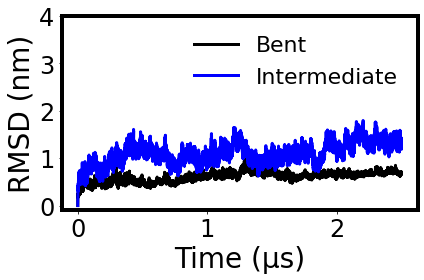

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Define time in microseconds 
time_microseconds = np.arange(0, len(bent_rmsd), dtype=float) * (1e-4) 

# Create a new figure for the first subplot
fig, ax = plt.subplots()

# Define colors and labels
colors = ['k', 'b']  # Bent, Int1
labels = ['Bent', 'Intermediate']

# Plot RMSD data for the first domain
ax.plot(time_microseconds, bent_rmsd, color=colors[0], linewidth=3.0, label=labels[0])
ax.plot(time_microseconds, int1_rmsd, color=colors[1], linewidth=3.0, label=labels[1])
#ax.plot(time_microseconds, Domain_1_small_protein_rmsd, color=colors[2], linewidth=3.0, label=labels[2])

#ax.set_title('Domain 1: Beta Propeller', fontsize=26)
ax.set_xlabel('Time (μs)', fontsize=28)
ax.set_ylabel('RMSD (nm)', fontsize=28)
ax.tick_params(axis='both', labelsize=24)
ax.set_yticks(np.arange(0, 5, 1))
ax.legend(frameon=False, fontsize=22)

# Adjust layout to include labels and save the figure
plt.tight_layout()
plt.setp(ax.spines.values(), linewidth=4)

# Save the figure including axis and labels
plt.savefig('Whole_Protein_RMSD.png', bbox_inches='tight', dpi=350)
plt.show()

In [76]:
print(np.mean(bent_rmsd))
print(np.mean(int1_rmsd))

0.6055139
1.0941874


In [77]:
print(np.std(bent_rmsd))
print(np.std(int1_rmsd))

0.10725597
0.22710349


In [78]:
bent_rmsf = md.rmsf(ca_traj_bent_protein,ca_traj_bent_protein,0)
int1_rmsf = md.rmsf(ca_traj_int1_protein,ca_traj_int1_protein,0)

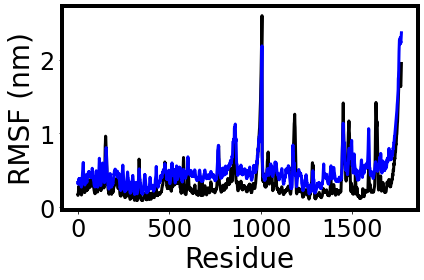

In [79]:
fig, ax = plt.subplots()

# Define colors and labels
colors = ['k', 'b']  # Bent, Int1, Small protein
#labels = ['Bent', 'Intermediate']

ax.plot(bent_rmsf, color=colors[0], linewidth=3.0)
ax.plot(int1_rmsf, color=colors[1], linewidth=3.0)

#ax.set_title('Domain 1: Beta Propeller', fontsize=26)
ax.set_xlabel('Residue', fontsize=28)
ax.set_ylabel('RMSF (nm)', fontsize=28)
ax.tick_params(axis='both', labelsize=24)
#ax.set_yticks(np.arange(0, 1500, 500))
#ax.legend(frameon=False, fontsize=22)


# Adjust layout to include labels and save the figure
plt.tight_layout()
plt.setp(ax.spines.values(), linewidth=4)

# Save the figure including axis and labels
plt.savefig('Whole_Protein_RMSF.png', bbox_inches='tight', dpi=350)
plt.show()

In [80]:
print(np.mean(bent_rmsf))
print(np.mean(int1_rmsf))

0.33494335
0.48745456


In [81]:
print(np.std(bent_rmsf))
print(np.std(int1_rmsf))

0.27738243
0.2580497


In [82]:
print(np.max(bent_rmsf))
print(np.min(bent_rmsf))

2.5964127
0.091616176


In [83]:
print(np.max(int1_rmsf))
print(np.min(int1_rmsf))

2.3640726
0.17428274


In [84]:
print(bent_rmsf)

[0.16892606 0.16136216 0.16534804 ... 1.7353638  1.8216548  1.9483638 ]


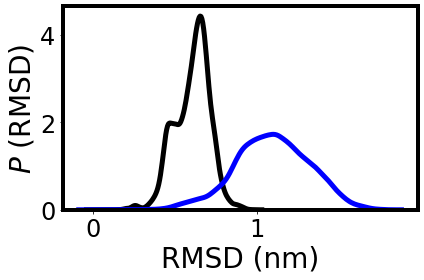

In [85]:
import seaborn as sns

# Create a new figure for the first subplot
fig, ax = plt.subplots()

# Define colors and labels
colors = ['k', 'b']  # Bent, Int1, Small protein
#labels = ['Bent', 'Intermediate']

# Plot RMSD data for the first domain
sns.kdeplot(bent_rmsd, color=colors[0], linewidth=5.0)
sns.kdeplot(int1_rmsd, color=colors[1], linewidth=5.0)

# Customize subplot appearance
#ax.set_title('Domain 1: Beta Propeller', fontsize=26)
ax.set_xlabel('RMSD (nm)', fontsize=28)
ax.set_ylabel('$\it{P}$ (RMSD)', fontsize=28)
ax.tick_params(axis='both', labelsize=24)
#ax.set_yticks(np.arange(0, 1500, 500))
#ax.legend(frameon=False, fontsize=22)


# Adjust layout to include labels and save the figure
plt.tight_layout()
plt.setp(ax.spines.values(), linewidth=4)

# Save the figure including axis and labels
plt.savefig('Histogram_of_RMSD.png', bbox_inches='tight', dpi=350)
plt.show()

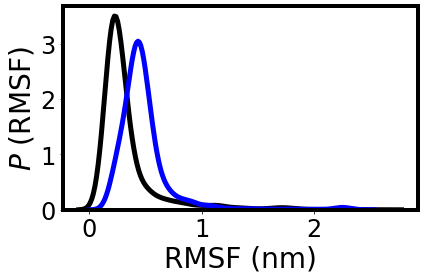

In [86]:
# Create a new figure for the first subplot
fig, ax = plt.subplots()

# Define colors and labels
colors = ['k', 'b']  # Bent, Int1, Small protein
#labels = ['Bent', 'Intermediate']

# Plot RMSD data for the first domain
sns.kdeplot(bent_rmsf, color=colors[0], linewidth=5.0, label=labels[0])
sns.kdeplot(int1_rmsf, color=colors[1], linewidth=5.0, label=labels[1])

# Customize subplot appearance
#ax.set_title('Domain 1: Beta Propeller', fontsize=26)
ax.set_xlabel('RMSF (nm)', fontsize=28)
ax.set_ylabel('$\it{P}$ (RMSF)', fontsize=28)
ax.tick_params(axis='both', labelsize=24)
#ax.set_yticks(np.arange(0, 1500, 500))
#plt.legend(frameon=False, fontsize=22, bbox_to_anchor=(1, 1))


# Adjust layout to include labels and save the figure
plt.tight_layout()
plt.setp(ax.spines.values(), linewidth=4)

# Save the figure including axis and labels
plt.savefig('Histogram_of_RMSF.png', bbox_inches='tight', dpi=350)
plt.show()